# Partielle Differentialgleichungen

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sys

In [5]:
print(sys.version)

3.10.4 (main, Nov 20 2024, 16:27:53) [Clang 16.0.0 (clang-1600.0.26.3)]


## Symbolische Mathematik mit Python

Ein hervorragendes Tool für die symbolische Mathematik mit Python ist das Paket `sympy`, das wir zunächst einbinden. Mit `init_printing` sorgen wir für eine schönere Darstellung der mathematischen Symbole.

In [6]:
import sympy as sp
sp.init_printing()

### Lösung von Gleichungen

Zunächst ein lineares Gleichungssystem.

In [7]:
x, y, z = sp.symbols("x y z")
sp.solve([x + y - 2, x - y + 1], (x, y))

Aber auch nichtlineare Systeme lassen sich manchmal mit Sympy lösen.

In [8]:
sp.solve([x - 2*y, x**2 + y**2 - z], (x, y))

### Ableitungen und Integrale

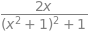

In [9]:
f = sp.atan(1 + x*x)
df = f.diff()
df

Wenn wir dies integrieren, sollte wieder die ursprüngliche Funktion herauskommen.

In [10]:
sp.integrate(df, x)

Nicht allle Ausdrücke werden sofort vereinfacht.

In [11]:
a = sp.cos(x)**2 + sp.sin(x)**2
a

Mit `simplify` lässt sich dies beheben.

In [12]:
a.simplify()

`simplify`, `diff` und viele andere Methoden lassen sich alternativ als Funktionen aufrufen:

In [13]:
df.integrate(x)

Auch bestimmte Integrale lassen sich natürlich berechnen.

In [14]:
sp.integrate(1/(1 + x*x), (x, 0, 1))

Das Symbol `oo` steht in Sympy für unendlich. Wir können es als `sp.oo` einbinden oder direkt aus Sympy importieren.

In [15]:
from sympy import oo

In [16]:
sp.integrate(sp.exp(-x**2), (x, -oo, oo))

### Summen und Reihen

In [17]:
k, N = sp.symbols("k N")
sp.summation(k, (k,1,N))

In [18]:
expr = sp.summation( x**k, (k, 0, oo))
expr

⎧   1                 
⎪ ─────    for │x│ < 1
⎪ 1 - x               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    k             
⎪  ╱   x    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪k = 0                
⎩                     

Am letzten Beispiel ist zu sehen, wie sympy mit Fallunterscheidungen umgeht. Implementiert ist das Ergebnis als stückweise definierte Funktion, auf deren Definition wir mit `expr.args` zugreifen können:

In [19]:
expr.args

⎛                  ⎛  ∞           ⎞⎞
⎜                  ⎜ ___          ⎟⎟
⎜                  ⎜ ╲            ⎟⎟
⎜⎛  1           ⎞  ⎜  ╲    k      ⎟⎟
⎜⎜─────, │x│ < 1⎟, ⎜  ╱   x , True⎟⎟
⎜⎝1 - x         ⎠  ⎜ ╱            ⎟⎟
⎜                  ⎜ ‾‾‾          ⎟⎟
⎝                  ⎝k = 0         ⎠⎠

Hiermit können wir natürlich auch die Definitionen auf Teilbereichen extrahieren:

In [20]:
expr.args[0][0]

Wir können auch mit Hilfe einer Substitution Bedingungen als  wahr annehmen:

In [21]:
expr = sp.summation( x**k, (k, 0, oo)).subs(sp.Abs(x) < 1, True)
expr

Dies hat allerdings seine Grenzen. Wir müssen den genauen Ausdruck angeben, sonst wird die Ersetzung nicht durchgeführt. Der folgende äquivalente Ausdruck wird nicht wunschgemäß ausgewertet:

In [22]:
sp.summation( x**k, (k, 0, oo)).subs(sp.Abs(x) - 1 < 0, True)

⎧   1                 
⎪ ─────    for │x│ < 1
⎪ 1 - x               
⎪                     
⎪  ∞                  
⎪ ___                 
⎨ ╲                   
⎪  ╲    k             
⎪  ╱   x    otherwise 
⎪ ╱                   
⎪ ‾‾‾                 
⎪k = 0                
⎩                     

### Lösung partieller Differentialgleichungen
Wir lösen die Gleichung
$$ u_t - v u_x = 0, $$
wobei $v$ eine reelle Konstante ist.

In [23]:
x, t, v = sp.symbols("x t v")
u = sp.Function("u")
phi = u(x, t)
eq = sp.diff(phi, t) + v*sp.diff(phi, x) # linke Seite der PDGl
sol = sp.pdsolve(eq)  # rechte Seite wird als 0 angenommen
sol

In [24]:
rhs = sol.rhs
rhs

In [25]:
F = sp.Function("F")
rhs.subs(F, sp.sin)

## Schwingende Saite

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

c = 1.0
L = 1.0
k = np.pi/L
omega = k*c
f = lambda x,t: np.sin(k*x - omega*t)
g = lambda x,t: np.sin(k*x + omega*t)

xs = np.linspace(-1, 2, 200)

@interact(t=(0, 10, 0.1))
def plot_wave(t=0):
    plt.figure(figsize=(10, 4))
    plt.axvspan(-1, 0, alpha=0.3, color='gray')
    plt.axvspan(1, 2, alpha=0.3, color='gray')
    fs = f(xs, t)
    gs = g(xs, t)
    hs = fs + gs
    plt.plot(xs, fs, linewidth=2, color='r')
    plt.plot(xs, gs, linewidth=2, color='b')
    plt.plot(xs, hs, linewidth=2, color='g')
    plt.ylim(-3, 3)
    plt.xlim(-1, 2)
    #plt.grid(True)
    plt.title(f't = {t:.2f}')
    plt.show()

interactive(children=(FloatSlider(value=0.0, description='t', max=10.0), Output()), _dom_classes=('widget-inte…